In [45]:
import pandas as pd

data = pd.read_csv("E:/Data Science/CSV dataset/StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [46]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [48]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


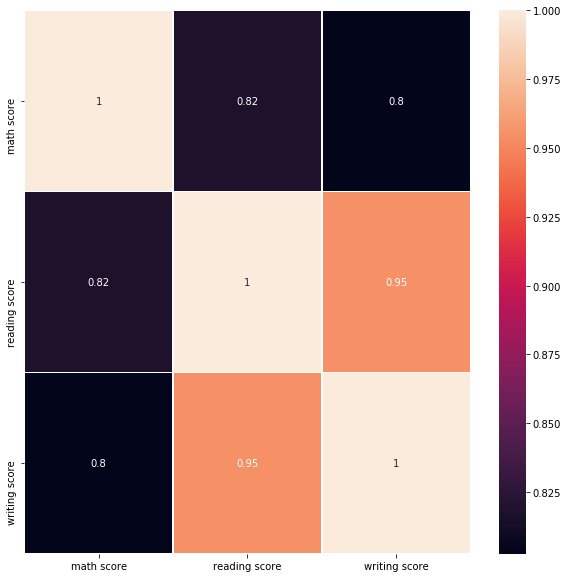

In [49]:
## Plotting heat map to show the correlations between the columns

import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(), annot = True, linewidth = 0.5)    ## Annot shows the values in the map.

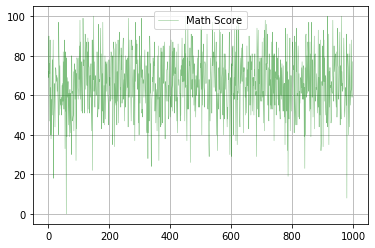

In [50]:
## Plotting the line plot


data['math score'].plot(kind = 'line', color = 'green', label = 'Math Score', linewidth = 0.5,\
                        alpha = 0.5, grid = True, linestyle = 'solid')

plt.legend(loc = 'upper center')     ## Used to fix the position of the title/label



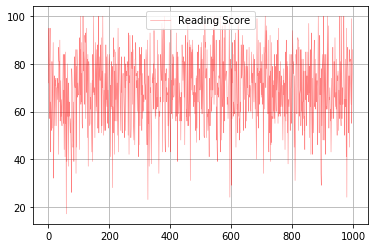

In [51]:
data['reading score'].plot(kind = 'line', color = 'red', label = 'Reading Score', linewidth = 0.5, \
                          alpha = 0.5, grid = True, linestyle = 'solid')

plt.legend(loc = 'upper center')

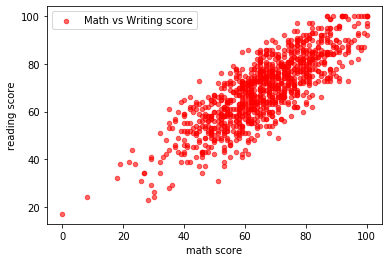

In [52]:
## Drawing scatter plot to see the relation between two columns

data.plot(kind = 'scatter', x = 'math score', y = 'reading score', color = 'red', label = 'Math vs Writing score',\
         alpha = 0.6, style = '.')

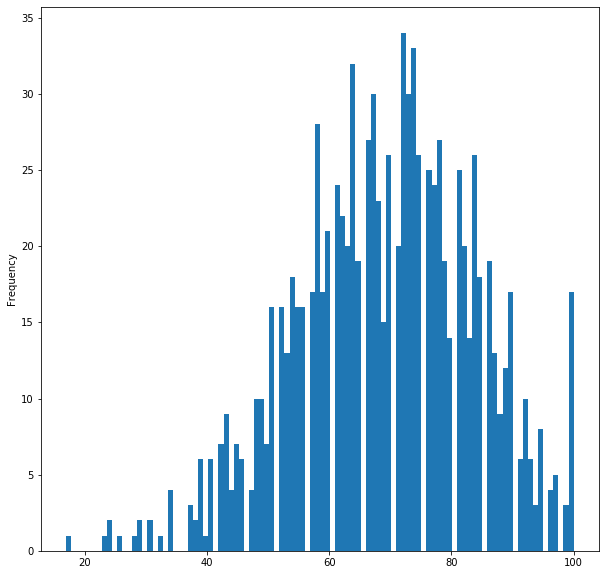

In [53]:
data['reading score'].plot(kind = 'hist', bins = 100, figsize = (10,10))

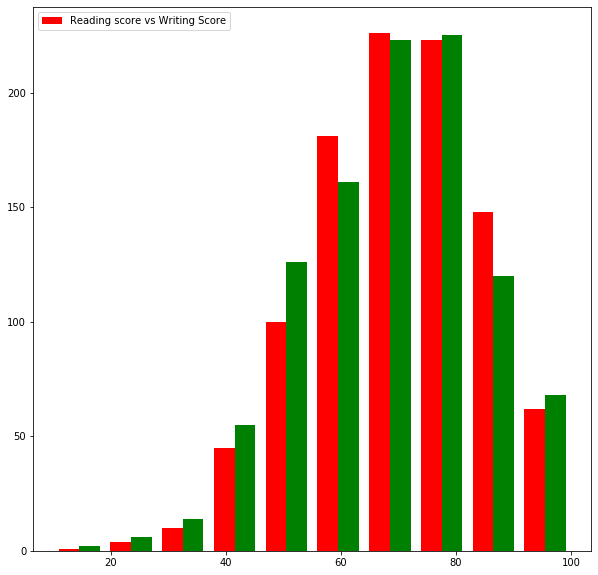

In [54]:
reading_score = data['reading score']
writing_score = data['writing score']

plt.figure(figsize = (10,10))
plt.hist([reading_score, writing_score], color = ['red', 'green'], label = 'Reading score vs Writing Score')     ## Figsize cannot be used here
#legend = plt.title('Reading score vs Writing Score')
plt.legend(loc = 'upper left')

In [84]:
# Setting the threshold value now in math score column

threshold = (sum(data['math score'])/ len(data['math score']))
print(f'Passing marks of Math Score: {threshold}\n')

data['Passed'] = ['Student passed' if i > threshold else 'Student failed' for i in data['math score']]
print(data.loc[1:10, 'math score':])


Passing marks of Math Score: 66.089

    math score  reading score  writing score          Passed
1           69             90             88  Student passed
2           90             95             93  Student passed
3           47             57             44  Student failed
4           76             78             75  Student passed
5           71             83             78  Student passed
6           88             95             92  Student passed
7           40             43             39  Student failed
8           64             64             67  Student failed
9           38             60             50  Student failed
10          58             54             52  Student failed


In [83]:
data.loc[1:10,['math score', 'Passed']]

,math score,Passed
1,69,Student passed
2,90,Student passed
3,47,Student failed
4,76,Student passed
5,71,Student passed
6,88,Student passed
7,40,Student failed
8,64,Student failed
9,38,Student failed
10,58,Student failed


In [89]:
data['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

In [93]:
## Checking the frequency of the particular column

print(data['race/ethnicity'].value_counts())   ## it will skip any missing value and print only available values
print('*' * 40)
data['race/ethnicity'].value_counts(dropna = False)  ## it will not skip any missing value and print all available values

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
****************************************


group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

using melt function()

id_vars = values which we donot want to convert
value_vars = values which we want to convert


In [94]:
data_head = data.head(5)
data_head

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Passed
0,female,group B,bachelor's degree,standard,none,72,72,74,Student passed
1,female,group C,some college,standard,completed,69,90,88,Student passed
2,female,group B,master's degree,standard,none,90,95,93,Student passed
3,male,group A,associate's degree,free/reduced,none,47,57,44,Student failed
4,male,group C,some college,standard,none,76,78,75,Student passed


In [98]:
melted = pd.melt(frame = data_head, id_vars = 'gender', value_vars = ['race/ethnicity', 'lunch'])
melted

,gender,variable,value
0,female,race/ethnicity,group B
1,female,race/ethnicity,group C
2,female,race/ethnicity,group B
3,male,race/ethnicity,group A
4,male,race/ethnicity,group C
5,female,lunch,standard
6,female,lunch,standard
7,female,lunch,standard
8,male,lunch,free/reduced
9,male,lunch,standard


In [101]:
# Concatenating data of two dataframe

data1 = data.head()
data2 = data.tail()
data3 = pd.concat([data1, data2], axis = 0, ignore_index = True)
data3

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Passed
0,female,group B,bachelor's degree,standard,none,72,72,74,Student passed
1,female,group C,some college,standard,completed,69,90,88,Student passed
2,female,group B,master's degree,standard,none,90,95,93,Student passed
3,male,group A,associate's degree,free/reduced,none,47,57,44,Student failed
4,male,group C,some college,standard,none,76,78,75,Student passed
5,female,group E,master's degree,standard,completed,88,99,95,Student passed
6,male,group C,high school,free/reduced,none,62,55,55,Student failed
7,female,group C,high school,free/reduced,completed,59,71,65,Student failed
8,female,group D,some college,standard,completed,68,78,77,Student passed
9,female,group D,some college,free/reduced,none,77,86,86,Student passed


In [106]:
data4 = pd.concat([data1, data2], axis = 0, ignore_index = True)  ## axis = 0 means it will add in a row
data4

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Passed
0,female,group B,bachelor's degree,standard,none,72,72,74,Student passed
1,female,group C,some college,standard,completed,69,90,88,Student passed
2,female,group B,master's degree,standard,none,90,95,93,Student passed
3,male,group A,associate's degree,free/reduced,none,47,57,44,Student failed
4,male,group C,some college,standard,none,76,78,75,Student passed
5,female,group E,master's degree,standard,completed,88,99,95,Student passed
6,male,group C,high school,free/reduced,none,62,55,55,Student failed
7,female,group C,high school,free/reduced,completed,59,71,65,Student failed
8,female,group D,some college,standard,completed,68,78,77,Student passed
9,female,group D,some college,free/reduced,none,77,86,86,Student passed


In [107]:
df1 = data['math score'].head(5) 
df2 = data['writing score'].head(5)
df = pd.concat([df1, df2], axis = 1)            ## axis = 1 means it will add along the columns
df

,math score,writing score
0,72,74
1,69,88
2,90,93
3,47,44
4,76,75


In [110]:
# Converting the datatype of the column

data['race/ethnicity'] = data['race/ethnicity'].astype('category')
data['race/ethnicity']

0      group B
1      group C
2      group B
3      group A
4      group C
        ...   
995    group E
996    group C
997    group C
998    group D
999    group D
Name: race/ethnicity, Length: 1000, dtype: category
Categories (5, object): [group A, group B, group C, group D, group E]

Filling missing values

In [120]:
import pandas as pd

df = pd.read_csv("E:/Data Science/CSV dataset/Titanic.csv")
df

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1
...,...,...,...,...,...
1308,"Zakarian, Mr Artun",3rd,27.00,male,0
1309,"Zakarian, Mr Maprieder",3rd,26.00,male,0
1310,"Zenni, Mr Philip",3rd,22.00,male,0
1311,"Lievens, Mr Rene",3rd,24.00,male,0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1313 non-null   object 
 1   PClass    1312 non-null   object 
 2   Age       756 non-null    float64
 3   Sex       1313 non-null   object 
 4   Survived  1313 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [122]:
## Checking the values of age column

df['Age'].value_counts(dropna = False)   


NaN     557
22.0     35
30.0     31
21.0     31
18.0     30
       ... 
67.0      1
69.0      1
70.0      1
7.0       1
0.8       1
Name: Age, Length: 76, dtype: int64

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1313 non-null   object 
 1   PClass    1312 non-null   object 
 2   Age       756 non-null    float64
 3   Sex       1313 non-null   object 
 4   Survived  1313 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 47.1+ KB
